<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6

## Conceptual

### Question 1

We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain $p + 1$ models, containing $0, 1, 2,...,p$ predictors. Explain your answers:

> (a) Which of the three models with $k$ predictors has the smallest *training* RSS?

> (b) Which of the three models with $k$ predictors has the smallest *test* RSS?

> (c) True or False:

> > i. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by forward stepwise selection.

> > ii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by backward stepwise selection.

> > iii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by forward stepwise selection.

> > iv. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by backward stepwise selection.

> > v. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the ($k + 1$)-variable model identified by best subset selection.

#### Answers to a

***Which of the three models with $k$ predictors has the smallest <u>training</u> RSS?***

Each of the three methods progress, NOT by comparing RSS among models, but rather by comparing an estimate of fit to test data (e.g., AIC, BIC, $R_{adj}^2$).

I think this means that any of the three methods may produce the lowest *training* RSS; this would be somewhat incidental since they are not trying to optimize for this.

#### Answer to b

***Which of the three models with $k$ predictors has the smallest <u>test</u> RSS?***

Since only the *best-subset* method will examine all $k$-predictor models, it will discover the best-fit model.  Either stepwise method may also find the same model, but this is not guarenteed.

#### Answer to c

***True or False:***

> ***i. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by forward stepwise selection.***

> > TRUE.  Since the $k+1$-variable model is defined as the $k$-variable model plus the next most appropriate ($k+1^{th}$) variable.

> >

> ***ii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by backward stepwise selection.***

> > TRUE.  For the analagous reason given in (i).

> >

> ***iii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the ($k + 1$)-variable model identified by forward stepwise selection.***

> > FALSE.  These are both "greedy" algorithms such that their path though variable-selection space are not necessarily related.

> >

> ***iv. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the ($k+1$)-variable model identified by backward stepwise selection.***

> > FALSE.  For the analagous reason given in (iii).

> >

> ***v. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the ($k + 1$)-variable model identified by best subset selection.***

> > FALSE.  Best-subset selection is not a greedy algorithm; all possible models are examined.

### Question 2

For parts (a) through (c), indicate which of i. through iv. is correct. Justify your answer.

> (a) The lasso, relative to least squares, is:

> > i. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

> > ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

> > iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.

> > iv. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

> (b) Repeat (a) for ridge regression relative to least squares.

> (c) Repeat (a) for non-linear methods relative to least squares.

#### Answers

The correct answer for both **(a)** and **(b)** is

> ***iii. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance***.  

This can be seen by realizing that both lasso and ridge regression can be thought of as *least squares <u>plus penalty</u>*,

$$\text{RSS} + \lambda \left(\sum_{j=1}^p |\beta|^q\right)^{1/q}$$

which acts as an additional constrant on the solution space.  This is the same as imposing bias; variance is obversely reduced since the solution space is smaller.  

For **(c)**, the correct answer is

> ***ii. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias***.  

Nonlinear models are inherently more flexible than linear models.  The expands the solution space, but at the risk of admitting too much variance.

### Question 3

Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$\sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 \text{subject to } \sum_{j=1}^{p} |\beta_j| \le s$$

for a particular value of $s$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

> (a) As we increase $s$ from 0, the training RSS will:

> > i. Increase initially, and then eventually start decreasing in an inverted U shape.

> > ii. Decrease initially, and then eventually start increasing in a U shape.

> > iii. Steadily increase.

> > iv. Steadily decrease.

> > v. Remain constant.

> (b) Repeat (a) for test RSS.

> (c) Repeat (a) for variance.

> (d) Repeat (a) for (squared) bias.

> (e) Repeat (a) for the irreducible error.

#### Answers

I want to think about this in terms of a different formulation of the lasso:

$$\sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^p |\beta_j| \approx RSS_{LS} + \frac{1}{s} \sum_{j=1}^p |\beta_j|$$

***Training RSS***

To start, I want to get a sense of what's happening as we increase $s$ from 0.  The question is detailing the lasso wherein an additional penality is incurred as a function of $s$; the larger $s$, the smaller this additional penalty.  Hence, the correct answr is **iv. Steadily decrease.**

\

***Test RSS***

Another way we can characterize the additional penalty is to say that smaller values of $s$ imply a more restricted model while larger values of $s$ imply more flexible models.  On test data, increased flexibility may initially decrease total error but will eventually yield increasing error.  So the most appropriate answer is **ii. Decrease initially, and then eventually start increasing in a U shape.**

\

***Variance***

Piggybacking off of the previous answer, larger values of $s$ imply greater flexibility, and thus a larger solution space in which to vary.  Thus, the correct answer is **iii. Steadily increase.**

\

***Bias***

If increasing $s$ increases variance, then it also decreases bias.  So the correct answr is **iv. Steadily decrease.**

\

***Irreducible Error***

Irreducible error is, well, irreducible.  So the correct answer is **v. remain constant**.

\

Except for training RSS, we can see these tendencies in the doctored image below.



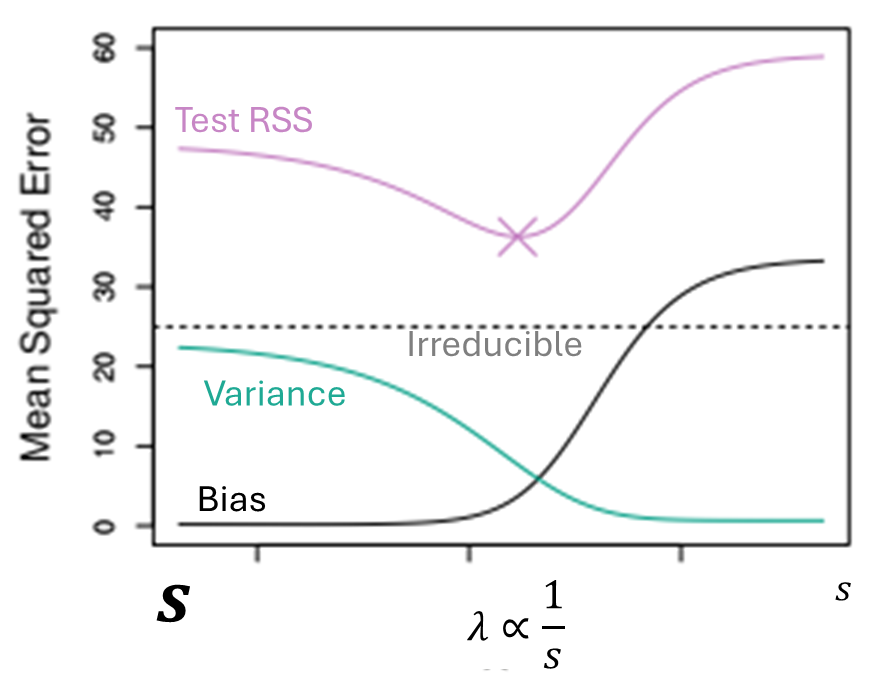

### Question 4

Suppose we estimate the regression coefficients in a linear regression model by minimizing

$$\sum_{i=1}^{n} \left(y_i - \beta_0 - \sum_{j=1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{p} \beta_j^2$$

for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

> (a) As we increase $\lambda$ from 0, the training RSS will:

> > i. Increase initially, and then eventually start decreasing in an inverted U shape.

> > ii. Decrease initially, and then eventually start increasing in a U shape.

> > iii. Steadily increase.

> > iv. Steadily decrease.

> > v. Remain constant.

> (b) Repeat (a) for test RSS.

> (c) Repeat (a) for variance.

> (d) Repeat (a) for (squared) bias.

> (e) Repeat (a) for the irreducible error.

#### Answers

This question is similar to Question 3, except it is dealing with *ridge* regression (rather than lasso) and uses a different formulation (in terms of $\lambda$ rather than $s$).

Remember that $\lambda$ and $s$ are roughly inversely related.  Hence, the answers here will be roughly opposite (with one exception, *irreducible error*) compared to Question 3.  We'll go through these, but this reproduced image will help (except for training RSS).

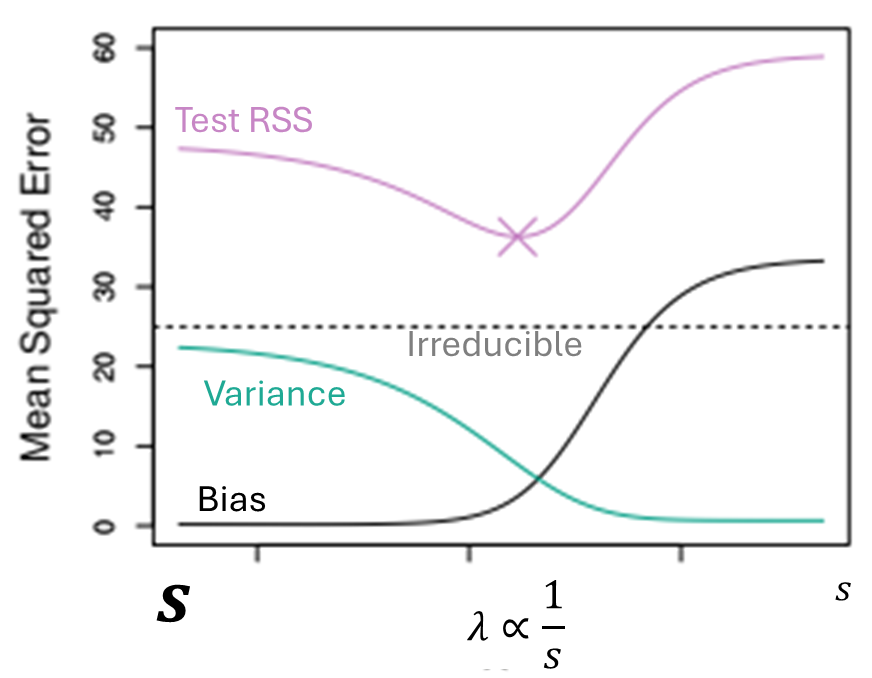

**Training RSS**

When $\lambda = 0$, the model is minimally constrained and thus most flexible.  As lambda gets larger, the model becomes less flexible and fits the training data worse.  Hence, the correct answer is **iii. Steadily increase.**

\

**Test RSS**

At maximal flexibility (i.e., when $\lambda = 0$), the fit to test data is unlikely to be optimal.  Imposing some constraint ($\lambda > 0$), then, will improve fit to test data...to a point.  When the $\lambda$ exceeds some threshold, too much bias will have been imposed and so the fit will get worse.  Hence, the correct answer is **ii. Decrease initially, and then eventually start increasing in a U shape.**

\

**Variance**

Again, the solution space becomes more constrained as $\lambda$ grows such that **iv. Steadily decrease.**

\

**Bias**

Conversely, bias will **iii. Steadily increase**.

\


**Irreducible Error**

**v. Remain constant.**

### Question 5❗

It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting.

Suppose that $n = 2$, $p = 2$, $x_{11} = x_{12}$, $x_{21} = x_{22}$. Furthermore, suppose that $y_1 +y_2 = 0$ and $x_{11} + x_{21} = 0$ and $x_{12} + x_{22} = 0$, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: $\hat{\beta}_0 = 0$.

> (a) Write out the ridge regression optimization problem in this setting.

> (b) Argue that in this setting, the ridge coefficient estimates satisfy $\hat{β}_1 = \hat{β}_2$.

> (c) Write out the lasso optimization problem in this setting.

> (d) Argue that in this setting, the lasso coefficients $\hat{β}_1$ and $\hat{β}_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.

#### Answer to a

**Write out the ridge regression optimization problem in this setting.**

Recall that ridge regression tries to minimize

$$\sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\right)^2 +
  \lambda\sum_{j=1}^p\beta_j^2$$

Obeying the restrictions laid out in the problem, we can rewrite this as

$$\begin{aligned}
\sum_{i=1}^{2} \left(y_i - \sum_{j=1}^{2} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{2} \beta^2_j &= \sum_{i=1}^{2} \left(y_i - \sum_{j=1}^{2} \beta_j x_{ij} \right) \left(y_i - \sum_{j=1}^{2} \beta_j x_{ij} \right) + \lambda \beta_1^2 + \lambda \beta_2^2 \\
&= (y_1 - \beta_1 x_{11} - \beta_2 x_{12})^2 + (y_2 - \beta_1 x_{21} - \beta_2 x_{22})^2 + \lambda(\beta_1^2 + \beta_2^2) \\
&\text{$x_{11} = x_{12}$ and $x_{21} = x_{22}$} \\
&= (y_1 - \beta_1 x_{1} - \beta_2 x_{1})^2 + (y_2 - \beta_1 x_{2} - \beta_2 x_{2})^2 + \lambda(\beta_1^2 + \beta_2^2) \\
&= (y_1 - x_1(\beta_1 + \beta_2))^2 + (y_2 - x_2(\beta_1 + \beta_2))^2 + \lambda(\beta_1^2 + \beta_2^2) \\
&\text{$y_1 = -y_2$ and $x_1 = -x_2$} \\
&= (y -x(\beta_1 + \beta_2))^2 + (-y + x(\beta_1 + \beta_2))^2 + \lambda(\beta_1^2 + \beta_2^2) \\
&= 2(y - x(\beta_1 + \beta_2))^2 + \lambda(\beta_1^2 + \beta_2^2) \\
\end{aligned}$$

We could continue multiplying through to get a final form, but I think this is more than enough for the question.

#### Answer to b

***Argue that in this setting, the ridge coefficient estimates satisfy $\hat{β}_1 = \hat{β}_2$.***

Intuitively, since $x_{i1} = x_{i2}$ (that is, since the corresponding $x$ values for both $\beta$'s are equal), we might expect that $\hat{β}_1 = \hat{β}_2$.  We can demonstrate this by solving for the $\beta$ terms.

To solve, we take the partial derivative of the above equation with respect to a $\beta_j$; the partial derivative is then set to equal 0, and we solve for the $\beta_j$.

$$
\frac{\partial f}{\partial{\beta_1}} =
  - 2x_1(y_1 - \beta_1 x_1 - \beta_2 x_1) - 2x_2(y_2 - \beta_1 x_2 - \beta_2 x_2) + 2\lambda \beta_1
$$

$$
\frac{\partial f}{\partial{\beta_2}} =
  - 2x_1(y_1 - \beta_1 x_1 - \beta_2 x_1) - 2x_2(y_2 - \beta_1 x_2 - \beta_2 x_2) + 2\lambda \beta_2
$$

Setting these both equal to 0, we get that

$$
\beta_1 = \frac{x_1(y_1 - \beta_1 x_1 - \beta_2 x_1) + x_2(y_2 - \beta_1 x_2 - \beta_2 x_2)}{\lambda}
$$

$$
\beta_2 = \frac{x_1(y_1 - \beta_1 x_1 - \beta_2 x_1) + x_2(y_2 - \beta_1 x_2 - \beta_2 x_2)}{\lambda}
$$

Notice that the right-hand side of both equations is equal.  Hence, $\beta_1 = \beta_2$, which is what we were meant to show.

#### Answer to c

***Write out the lasso optimization problem in this setting.***

Recall that lasso regression tries to minimize

$$\sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\right)^2 +
  \lambda\sum_{j=1}^p |\beta_j|$$

We can use the same steps here that we did for the ridge regression, but changing the $\lambda$-penalty term

$$\begin{aligned}
\sum_{i=1}^{2} \left(y_i - \sum_{j=1}^{2} \beta_j x_{ij} \right)^2 + \lambda \sum_{j=1}^{2} |\beta_j| &= 2(y - x(\beta_1 + \beta_2))^2 + \lambda(|\beta_1| + |\beta_2|)\\
\end{aligned}$$

#### Answer to d

***Argue that in this setting, the lasso coefficients $\hat{β}_1$ and $\hat{β}_2$ are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.***

As we did for the ridge-regression example, let's take the partial derivatives:

$$\begin{aligned}
\frac{\partial f}{\partial{\beta_1}} &=
  \lambda \frac{\beta_1}{|\beta_1|} - 4x(y-x(\beta_1 + \beta_2)) \\
\end{aligned}$$

\

$$\begin{aligned}
\frac{\partial f}{\partial{\beta_2}} &=
  \lambda \frac{\beta_2}{|\beta_2|} - 4x(y-x(\beta_1 + \beta_2)) \\
\end{aligned}$$

Setting these to $0$, we get

$$\begin{aligned}
\beta_1 &= \frac{|\beta_1| \times 4x(y-x(\beta_1 + \beta_2))}{\lambda} \\
&= \frac{4x(xy\beta_2)}{\frac{\lambda}{|\beta_1|} + 4x^2 y}
\end{aligned}$$

and

$$\begin{aligned}
\beta_2 &= \frac{|\beta_2| \times 4x(y-x(\beta_1 + \beta_2))}{\lambda} \\
&= \frac{4x(xy\beta_1)}{\frac{\lambda}{|\beta_2|} + 4x^2 y}
\end{aligned}$$

Notice that $\beta_1 \not = \beta_2$.  So our solutions for $\beta_1$ and $\beta_2$ will likely differ from those for the ridge regression.  But we need to go further to show what is asked for: many solutions for $\beta_1$ and $\beta_2$.  

The things to recognize are that
1. $\beta_k$ shows up on the r.h.s. of the equation for $\beta_j$.  In other words, the $\beta$'s are not independent and can *compensate* for one another such that many combinations of $\beta_1$ and $\beta_2$ can yield the same output $y$.
2. $|\beta_j|$ shows up on r.h.s. of the equation for $\beta_j$.  The absolute value of $\beta_j$ implies 2 values for $\beta_j$.

### Question 6

We will now explore (6.12)

$$\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2$$

and (6.13)

$$\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^p |\beta_j|$$

further.

> (a) Consider (6.12) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.12) as a function of $β_1$. Your plot should confirm that (6.12) is solved by (6.14).

$$\hat{\beta}_j^R = y_j / (1+\lambda)$$

> (b) Consider (6.13) with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.13) as a function of $β_1$. Your plot should confirm that (6.13) is solved by (6.15).

$$
\hat{\beta}_j^L =
\begin{cases}
y_j - \lambda / 2 & \text{if } y_j > \lambda / 2; \\
y_j + \lambda / 2 & \text{if } y_j < -\lambda / 2; \\
0 & \text{if } |y_j| \leq \lambda / 2.
\end{cases}
$$

#### Answer to a

***Consider (6.12)***
***$$\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2$$***
***with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.12) as a function of $β_1$. Your plot should confirm that (6.12) is solved by (6.14).***
***$$\hat{\beta}_j^R = y_j / (1+\lambda)$$***

With $p=1$, (6.12) simplifies to

$$(y-\beta)^2 + \lambda \beta^2 = y^2 -2y\beta + \beta^2(1+\lambda)$$

Now, we're supposed to solve this graphically, and we will, but let's first solve in analytically.  To do so, we need to minimize (6.12) by taking its derivative, setting that to 0, and solving for $\beta$.

$$\frac{d}{d\beta}\left[(y-\beta)^2 + \lambda \beta^2 \right] = -2(y-\beta) + 2 \lambda \beta = 0$$
$$\rightarrow y - \beta + \lambda \beta = y - \beta(1 + \lambda) = 0$$
$$\rightarrow \beta = \frac{y}{1 + \lambda}$$

Now let's solve graphically.

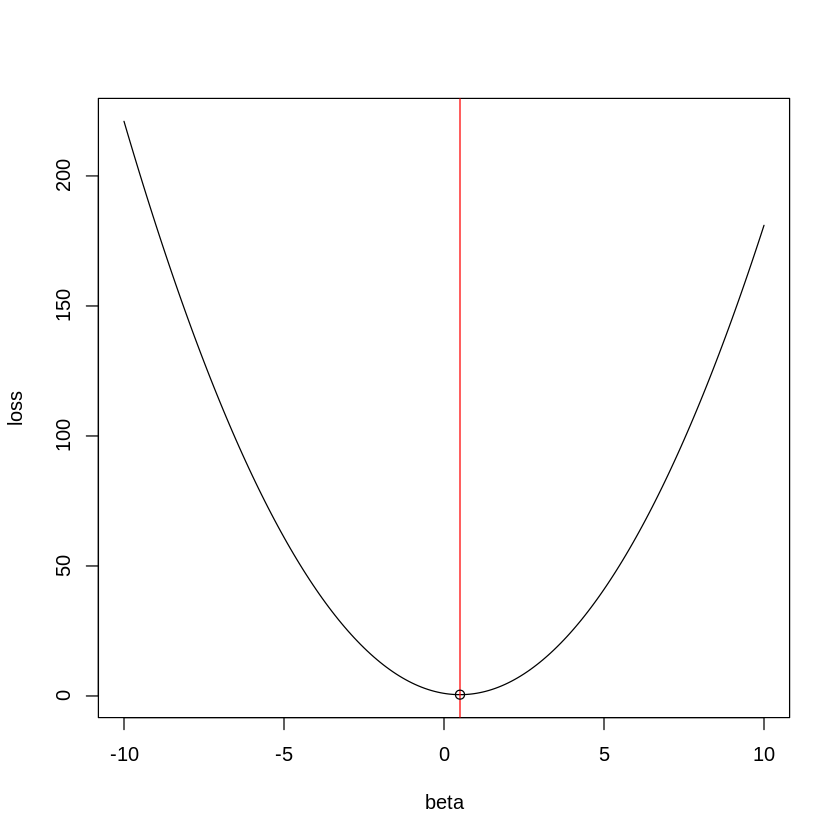

In [ ]:
y <- 1 # arbitrarily set y = 1
lambda <- 1 # arbitrarily set lambda = 1
beta <- seq(from=-10, to=10, by=0.1) # sequence of betas
loss <- (y-beta)^2 + lambda*beta^2
beta_of_minimum_loss <- y/(1+lambda)

plot(loss ~ beta, type="l")
abline(v=beta_of_minimum_loss, col="red")
points(min(loss) ~ beta[which.min(loss)]))

#### Answer to b

***Consider (6.13)***

***$$\sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^p |\beta_j|$$***

***with $p = 1$. For some choice of $y_1$ and $λ > 0$, plot (6.13) as a function of $β_1$. Your plot should confirm that (6.13) is solved by (6.15).***

***$$
\hat{\beta}_j^L =
\begin{cases}
y_j - \lambda / 2 & \text{if } y_j > \lambda / 2; \\
y_j + \lambda / 2 & \text{if } y_j < -\lambda / 2; \\
0 & \text{if } |y_j| \leq \lambda / 2.
\end{cases}
$$***

Let's try to solve this analytically again.  Simplifying (6.13) when $p=1$, we get

$$L = \sum_{j=1}^{p} (y_j - \beta_j)^2 + \lambda \sum_{j=1}^p |\beta_j| = y^2 -2y\beta + \lambda |\beta|$$

and the derivative

$$\frac{dL}{d \beta} = 2(\beta - y) + \lambda \frac{\beta}{|\beta|}$$

Setting this $\frac{dL}{d \beta}=0$, we get three expressions for $\beta$:

$$\hat{\beta}_j^L =
\begin{cases}
y - \frac{\lambda}{2} & \text{if } \beta > 0; \\
y + \frac{\lambda}{2} & \text{if } \beta < 0; \\
0 & \text{if } \beta = 0; \\
\end{cases}$$

From this, we can figure that

$$
\hat{\beta}_j^L =
\begin{cases}
y_j - \lambda / 2 & \text{if } y_j > \lambda / 2; \\
y_j + \lambda / 2 & \text{if } y_j < -\lambda / 2; \\
0 & \text{if } |y_j| \leq \lambda / 2.
\end{cases}
$$

Now we can solve this graphically.

[1] 4

[1] -4

[1] 3

[1] 1

[1] -1

[1] 0

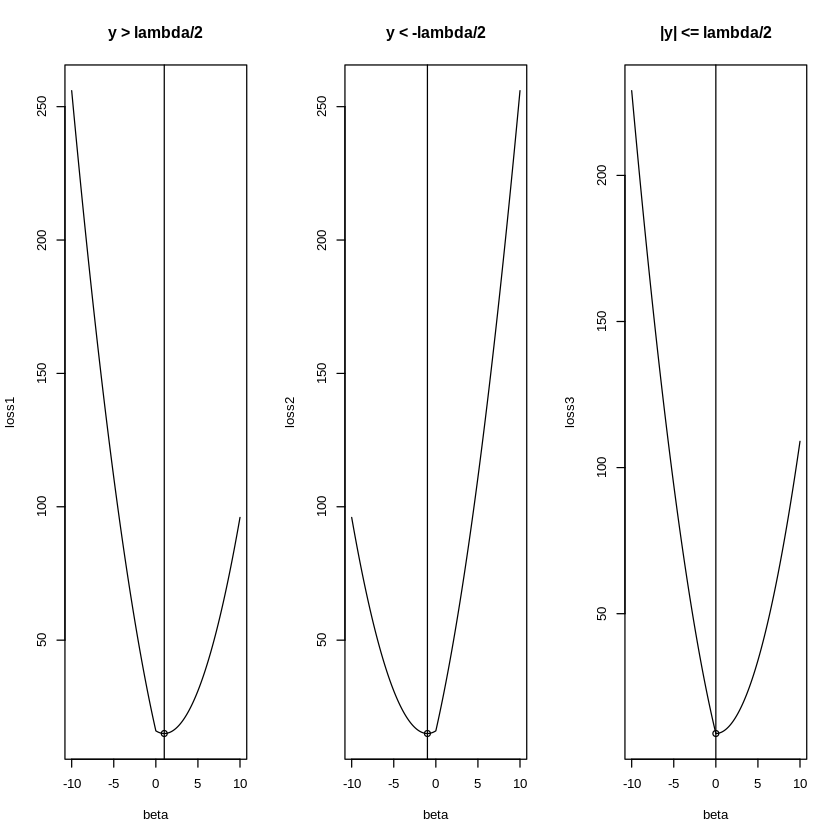

In [ ]:
lambda <- 6
(y1 <- lambda/2 + 1)
(y2 <- -lambda/2 - 1)
(y3 <- abs(lambda/2))

beta <- seq(from=-10, to=10, by=0.1) # sequence of betas

loss1 <- (y1-beta)^2 + lambda*abs(beta)
loss2 <- (y2-beta)^2 + lambda*abs(beta)
loss3 <- (y3-beta)^2 + lambda*abs(beta)

(b1 <- y1 - lambda/2)
(b2 <- y2 + lambda/2)
(b3 <- 0)

par(mfrow=c(1,3))
plot(loss1 ~ beta, type="l", main="y > lambda/2")
  abline(v=b1)
  points(min(loss1) ~ beta[which.min(loss1)])
plot(loss2 ~ beta, type="l", main="y < -lambda/2")
  abline(v=b2)
  points(min(loss2) ~ beta[which.min(loss2)])
plot(loss3 ~ beta, type="l", main="|y| <= lambda/2")
  abline(v=b3)
  points(min(loss3) ~ beta[which.min(loss3)])

### Question 7❗

We will now derive the Bayesian connection to the lasso and ridge regression discussed in Section 6.2.2.

(a) Suppose that $y_i = \beta_0 + \sum_{j=1}^p x_{ij} \beta_j + \epsilon_j$ where $ϵ_1,..., ϵ_n$ are independent and identically distributed from a $N(0, σ^2)$ distribution. Write out the likelihood for the data.

(b) Assume the following prior for $β: β_1,..., β_p$ are independent and identically distributed according to a double-exponential distribution with mean $0$ and common scale parameter $b$: i.e. $p(β) = \frac{1}{2b}\text{exp}^{(−|β|/b)}$. Write out the posterior for $β$ in this setting.

(c) Argue that the lasso estimate is the *mode* for $β$ under this posterior distribution.

(d) Now assume the following prior for $β: β_1,..., β_p$ are independent and identically distributed according to a normal distribution with mean zero and variance $c$. Write out the posterior for $β$ in this setting.

(e) Argue that the ridge regression estimate is both the mode and the mean for $β$ under this posterior distribution.

#### Answer to a

***Suppose that $y_i = \beta_0 + \sum_{j=1}^p x_{ij} \beta_j + \epsilon_j$ where $ϵ_1,..., ϵ_n$ are independent and identically distributed from a $N(0, σ^2)$ distribution. Write out the likelihood for the data.***

The likelihood is a statement about the probability of the data **given** specified parameter values (here, $\vec{\beta}$ and $\sigma^2$).  So we can find a likelihood for every combination of values for $\sigma^2$ and $\beta_i \text{ for } i \in \{1,...,n\}$.

$$\begin{align}
L(\vec{\beta}, \sigma^2 | \mathbf{X}, \vec{y}) &= \prod_{i=1}^n p(\vec{x}_i, y_i | \vec{\beta}, \sigma^2) \\
&= \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}}
 \text{ exp}\left[-\frac{1}{2 \sigma^2} (y_i - \mu_i)^2 \right] \\
& \text{where } \mu_i = \beta_0 + \sum_{j=1}^p x_{ij} \beta_j
\end{align}$$

We could simplify this a bit more, getting rid of the product sign, by

$$\left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \text{exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 \right]$$

#### Answer to b

***Assume the following prior for $β: β_1,..., β_p$ are independent and identically distributed according to a double-exponential distribution with mean $0$ and common scale parameter $b$: i.e. $p(β) = \frac{1}{2b}\text{exp}^{(−|β|/b)}$. Write out the posterior for $β$ in this setting.***

The posterior distribution is

$$\begin{align}
p(\vec{\beta}, \sigma^2 | \mathbf{X}, \vec{y}) &= \frac{L(\vec{\beta}, \sigma^2 | \mathbf{X}, \vec{y}) \times p(\vec{\beta}, \sigma^2)}{\int_{\vec{\beta}, \sigma^2} L(\vec{\beta}, \sigma^2 | \mathbf{X}, \vec{y}) p(\vec{\beta}, \sigma^2) \ d\beta \ d\sigma^2} \\
&= \frac{p(\vec{y} | \mathbf{X}, \vec{\beta}, \sigma^2) \times p(\vec{\beta}, \sigma^2)}{\int_{\vec{\beta}, \sigma^2} p(\vec{y} | \mathbf{X}, \vec{\beta}, \sigma^2) p(\vec{\beta}, \sigma^2) \ d\beta \ d\sigma^2} \\
\end{align}$$

We're being asked about the $\beta$ terms only, and we're assuming that $\vec{\beta} \perp \sigma^2$, so let's simplify this to

$$\begin{align}
p(\vec{\beta} | \mathbf{X}, \vec{y}) &= \frac{p(\vec{y} | \mathbf{X}, \vec{\beta}) \times p(\vec{\beta})}{\int_{\vec{\beta}} p(\vec{y} | \mathbf{X}, \vec{\beta}) p(\vec{\beta}) \ d\beta} \\
& \propto p(\vec{y} | \mathbf{X}, \vec{\beta}) \times p(\vec{\beta}) \\
\end{align}$$

where we're just looking at the proportionality by dropping the denominator (since it marginalizes out the $\vec{\beta}$).

We already have expressions for both terms on the righthand side of the propotionality, so we get

$$\begin{align}
p(\vec{\beta} | \mathbf{X}, \vec{y}) & \propto p(\vec{y} | \mathbf{X}, \vec{\beta}) \times p(\vec{\beta}) \\
& \propto \left(\left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \text{exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 \right] \right) \times \left(\prod_{j=1}^p \frac{1}{2b}\text{exp}^{(−|β_j|/b)} \right) \\
& \propto \left(\left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \text{exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 \right] \right) \times \left(\left(\frac{1}{2b}\right)^p \text{ exp } \left[-\frac{1}{b} \sum_{j=1}^p |\beta_j| \right]\right) \\
& \propto \left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \left(\frac{1}{2b} \right)^p \text{ exp}\left[-\left(\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{1}{b} \sum_{j=1}^p |\beta_j| \right) \right] \\
& \propto K \text{ exp}\left[-\left(\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{1}{b} \sum_{j=1}^p |\beta_j| \right) \right] \\
& \propto \text{ exp}\left[-\left(\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{1}{b} \sum_{j=1}^p |\beta_j| \right) \right] \\
\end{align}$$

where the 2 leftmost terms of the third-to-last line combine to a constant, which we can drop and still retain proportionality.

#### Answer to c

***Argue that the lasso estimate is the mode for $β$ under this posterior distribution.***

The common notion of the mode refers to discrete distributions: *the most common value*.  In other words, it's the most probable value of the (posterior) distribution of values.  We can generalize this for continuous probability distributions (e.g., the probability distribution of $\beta$) by stating that the mode is the value of $\beta$ that is most probable--the peak of the posterior probability distribution.

So translating our question a bit, we need to show that the most probable value for $\vec{\beta}$ given the assumed normal distribution of our data, $\vec{y}$, and double-exponential distribution of $\beta$ is equal to the estimate of $\beta$ from using lasso (given a specific $\lambda$):

$$\min_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\} = \max_{\vec{\beta}} (p(\vec{\beta} | \mathbf{X}, \vec{y})) = \max_{\vec{\beta}}  \left\{ \exp \left[-\left(\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{1}{b} \sum_{j=1}^p |\beta_j| \right) \right] \right\}$$

We can take the log of the righthand expression to get

$$\min_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\} = \max_{\vec{\beta}}  \left\{ -\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 - \frac{1}{b} \sum_{j=1}^p |\beta_j| \right\} = \min_{\vec{\beta}}  \left\{ \frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{1}{b} \sum_{j=1}^p |\beta_j| \right\} = \min_{\vec{\beta}}  \left\{ \frac{1}{2 \sigma^2} \left( \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{2 \sigma^2}{b} \sum_{j=1}^p |\beta_j| \right) \right \}$$

Notice the parallels between the two expressions.

$$\min_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\} = \min_{\vec{\beta}}  \left\{ \frac{1}{2 \sigma^2} \left( \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{2 \sigma^2}{b} \sum_{j=1}^p |\beta_j| \right) \right \} = \min_{\vec{\beta}}  \left\{ \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{2 \sigma^2}{b} \sum_{j=1}^p |\beta_j| \right \}$$

where the final equality is allowed because $\frac{1}{2 \sigma^2}$ is a scalar.  If $\lambda = \frac{2 \sigma^2}{b}$, then both sides are equivalent.

#### Answer to d

***Now assume the following prior for $β: β_1,..., β_p$ are independent and identically distributed according to a normal distribution with mean zero and variance $c$. Write out the posterior for $β$ in this setting.***

This answer will follow the steps from part **b**, but now $\vec{\beta} \sim normal(0, c)$.

$$\begin{align}
p(\vec{\beta} | \mathbf{X}, \vec{y}) & \propto p(\vec{y} | \mathbf{X}, \vec{\beta}) \times p(\vec{\beta}) \\
& \propto \left(\left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \text{exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 \right] \right) \times \left(\frac{1}{\sqrt{2 \pi c}} \right)^p \text{exp}\left[-\frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right] \\
& \propto  \left(\frac{1}{\sqrt{2 \pi \sigma^2}} \right)^n \left(\frac{1}{\sqrt{2 \pi c}} \right)^p \text{exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 -\frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right]\\
& \propto  k \text{ exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 -\frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right]\\
& \propto \text{exp}\left[-\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 -\frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right]\\
\end{align}$$

#### Answer to e

***Argue that the ridge regression estimate is both the mode and the mean for $β$ under this posterior distribution.***

Analagous to part **c**, we want to show how the maximum of this expression is equal to the minimum of the loss function for ridge regression.  We can use the logs since the max/min of the log-transformed functions is the same as the untransformed versions.

$$\min_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right\} = \max_{\vec{\beta}}  \left\{ -\frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 - \frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right\} = \min_{\vec{\beta}}  \left\{ \frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{1}{2c} \sum_{j=1}^p \beta_j^2 \right\} = \min_{\vec{\beta}}  \left\{ \frac{1}{2 \sigma^2} \left( \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{2 \sigma^2}{2c} \sum_{j=1}^p \beta_j^2 \right) \right \} = \min_{\vec{\beta}}  \left\{ \frac{1}{2 \sigma^2} \left( \sum_{i=1}^n (y_i - \mu_i)^2 + \frac{\sigma^2}{c} \sum_{j=1}^p \beta_j^2 \right) \right \} = \min_{\vec{\beta}}  \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \frac{\sigma^2}{c} \sum_{j=1}^p \beta_j^2 \right \}$$

Again, look at the similarities between the two expressions:

$$\min_{\vec{\beta}} \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \lambda \sum_{j=1}^p \beta_j^2 \right\} = \min_{\vec{\beta}}  \left\{\sum_{i=1}^n (y_i - \mu_i)^2 + \frac{\sigma^2}{c} \sum_{j=1}^p \beta_j^2 \right \}$$

To make them equal, set $\lambda = \frac{\sigma^2}{c}$.  Since the mean equals the mode in symmetric distributions (which is the case for $\beta$), we have the the ridge regression is the mean and mode of the posterior.

## Applied

### Question 8

In this exercise, we will generate simulated data, and will then use this data to perform best subset selection.

> (a) Use the `rnorm()` function to generate a predictor $X$ of length `n = 100`, as well as a noise vector $ϵ$ of length `n = 100`.

> (b) Generate a response vector `Y` of length `n = 100` according to the model $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + ϵ$, where $β_0$, $β_1$, $β_2$, and $β_3$ are constants of your choice.

> (c) Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X^2,...,X^{10}$. What is the best model obtained according to $Cp$, $BIC$, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.

> (d) Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?

> (e) Now fit a lasso model to the simulated data, again using $X, X^2, ...,X^{10}$ as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

> (f) Now generate a response vector $Y$ according to the model $Y = β_0 + β_7 X^7 + ϵ$, and perform best subset selection and the lasso. Discuss the results obtained.

#### Answers to a and b

***(a) Use the `rnorm()` function to generate a predictor $X$ of length `n = 100`, as well as a noise vector $ϵ$ of length `n = 100`.***

\

***(b) Generate a response vector `Y` of length `n = 100` according to the model $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + ϵ$, where $β_0$, $β_1$, $β_2$, and $β_3$ are constants of your choice.***

In [ ]:
# Use the rnorm() function to generate a predictor  X  of length n = 100,
# as well as a noise vector  ϵ  of length n = 100.
N=100
N_predictors <- 10
X <- rnorm(n=N)

# Generate a response vector Y of length n = 100 according to the model  Y=β0+β1X+β2X2+β3X3+ϵ,
# where  β0 ,  β1 ,  β2 , and  β3  are constants of your choice.
B0 <- rnorm(1, mean=0, sd=10)
B <- rnorm(N_predictors, mean=0, sd=10)
eps <- rnorm(n=N, mean=0, sd=2)
y <- B0 + B[1]*X + B[2]*X^2 + B[3]*X^3 + eps

#### Answer to c

***Use the `regsubsets()` function to perform best subset selection in order to choose the best model containing the predictors $X, X_2,...,X_{10}$. What is the best model obtained according to $Cp$, $BIC$, and adjusted $R^2$? Show some plots to provide evidence for your answer, and report the coefficients of the best model obtained. Note you will need to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.***

,(Intercept),"poly(X, 10)1","poly(X, 10)2","poly(X, 10)3","poly(X, 10)4","poly(X, 10)5","poly(X, 10)6","poly(X, 10)7","poly(X, 10)8","poly(X, 10)9","poly(X, 10)10"
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


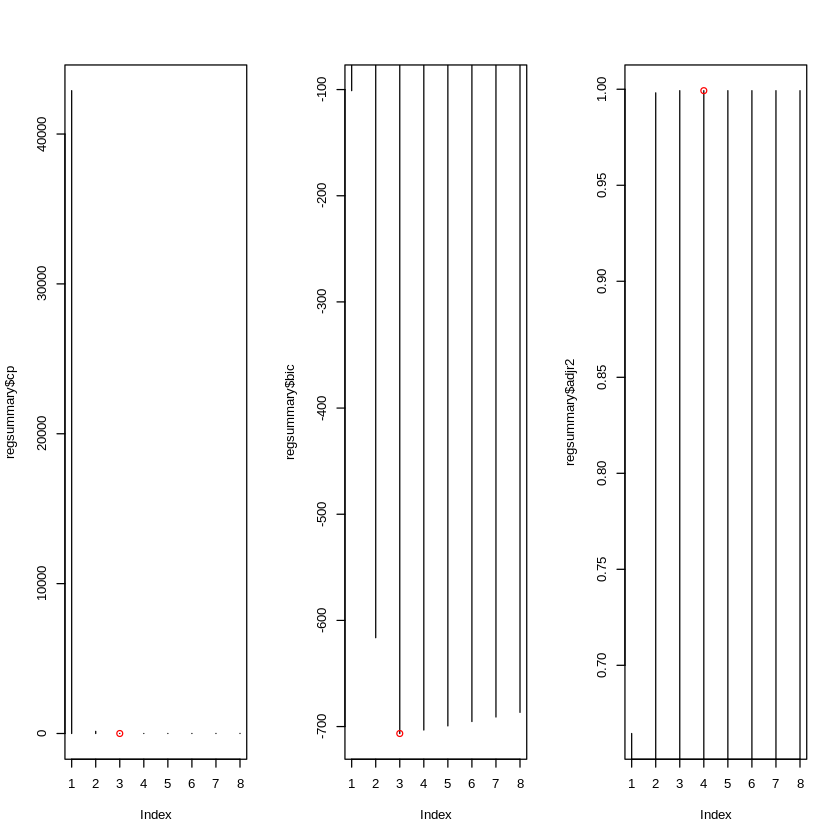

In [ ]:
#install.packages("leaps")
library(leaps)
d_matr <- cbind(y, X)
df <- as.data.frame(d_matr)

regfit <- regsubsets(y ~ poly(X, 10), data=df)
regsummary <- summary(regfit)

par(mfrow=c(1,3))
plot(regsummary$cp, type="h")
  points(which.min(regsummary$cp), regsummary$cp[which.min(regsummary$cp)], col="red")
plot(regsummary$bic, type="h")
  points(which.min(regsummary$bic), regsummary$bic[which.min(regsummary$bic)], col="red")
plot(regsummary$adjr2, type="h")
    points(which.max(regsummary$adjr2), regsummary$adjr2[which.max(regsummary$adjr2)], col="red")

regsummary$which[c(which.min(regsummary$cp),
                   which.min(regsummary$bic),
                   which.max(regsummary$adjr2)),]

#### Answer to d

***Repeat (c), using forward stepwise selection and also using backwards stepwise selection. How does your answer compare to the results in (c)?***



,(Intercept),"poly(X, 10)1","poly(X, 10)2","poly(X, 10)3","poly(X, 10)4","poly(X, 10)5","poly(X, 10)6","poly(X, 10)7","poly(X, 10)8","poly(X, 10)9","poly(X, 10)10"
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


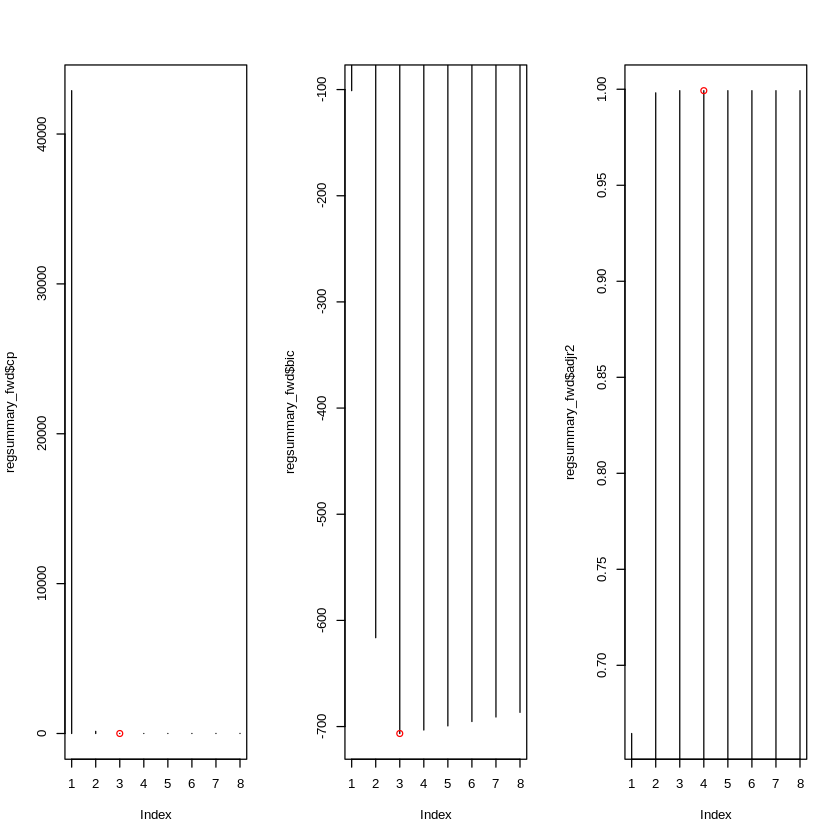

In [ ]:
regfit_fwd <- regsubsets(y ~ poly(X, 10), method="forward", data=df)
regsummary_fwd <- summary(regfit_fwd)

par(mfrow=c(1,3))
plot(regsummary_fwd$cp, type="h")
  points(which.min(regsummary_fwd$cp), regsummary_fwd$cp[which.min(regsummary_fwd$cp)], col="red")
plot(regsummary_fwd$bic, type="h")
  points(which.min(regsummary_fwd$bic), regsummary_fwd$bic[which.min(regsummary_fwd$bic)], col="red")
plot(regsummary_fwd$adjr2, type="h")
    points(which.max(regsummary_fwd$adjr2), regsummary_fwd$adjr2[which.max(regsummary_fwd$adjr2)], col="red")

regsummary_fwd$which[c(which.min(regsummary_fwd$cp),
                   which.min(regsummary_fwd$bic),
                   which.max(regsummary_fwd$adjr2)),]

,(Intercept),"poly(X, 10)1","poly(X, 10)2","poly(X, 10)3","poly(X, 10)4","poly(X, 10)5","poly(X, 10)6","poly(X, 10)7","poly(X, 10)8","poly(X, 10)9","poly(X, 10)10"
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


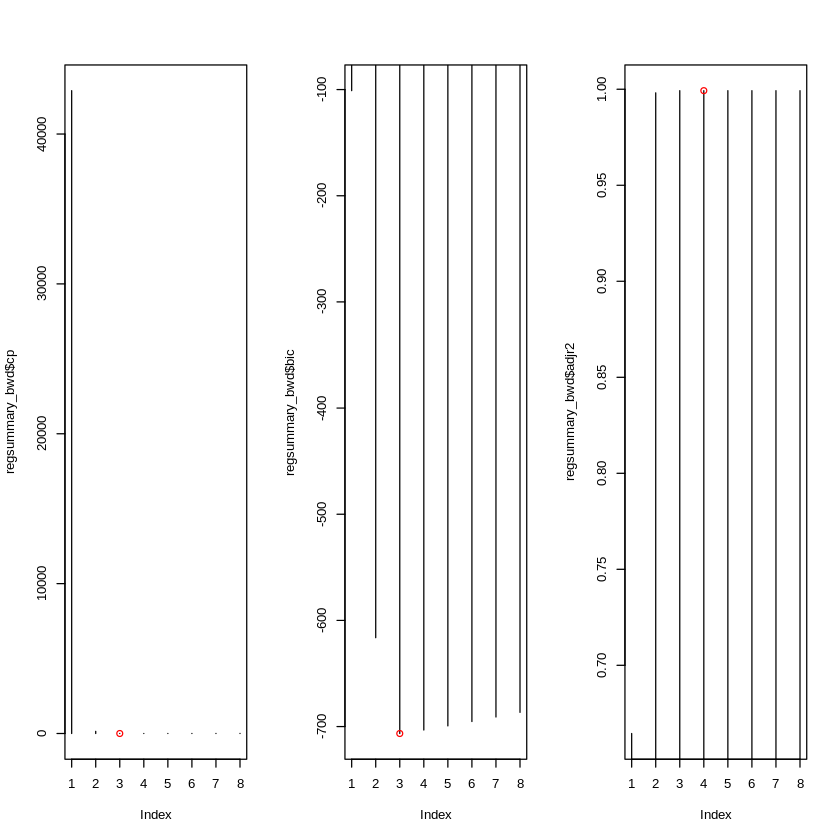

In [ ]:
regfit_bwd <- regsubsets(y ~ poly(X, 10), method="backward", data=df)
regsummary_bwd <- summary(regfit_bwd)

par(mfrow=c(1,3))
plot(regsummary_bwd$cp, type="h")
  points(which.min(regsummary_bwd$cp), regsummary_bwd$cp[which.min(regsummary_bwd$cp)], col="red")
plot(regsummary_bwd$bic, type="h")
  points(which.min(regsummary_bwd$bic), regsummary_bwd$bic[which.min(regsummary_bwd$bic)], col="red")
plot(regsummary_bwd$adjr2, type="h")
    points(which.max(regsummary_bwd$adjr2), regsummary_bwd$adjr2[which.max(regsummary_bwd$adjr2)], col="red")

regsummary_bwd$which[c(which.min(regsummary_bwd$cp),
                   which.min(regsummary_bwd$bic),
                   which.max(regsummary_bwd$adjr2)),]

These methods produce identical results to best subset.

#### Answer to e

***Now fit a lasso model to the simulated data, again using $X, X^2, ...,X^{10}$ as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.***

11 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)  -0.9014924
1           548.7665366
2             .        
3           348.1350532
4             .        
5             .        
6             .        
7             .        
8             .        
9             .        
10            .        

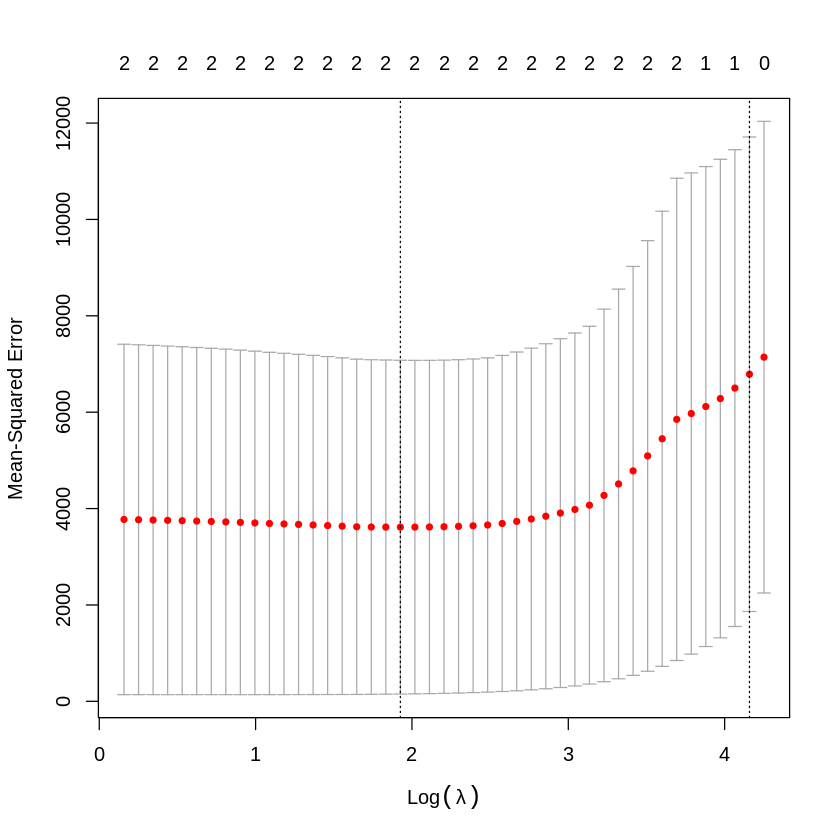

In [ ]:
#install.packages("glmnet")
library(glmnet)

train_p <- 0.75
train_n <- floor(train_p * nrow(df))
train_ind <- sample(nrow(df), size=train_n, replace=FALSE, prob=NULL)
x_train <- as.matrix(df[train_ind, -1])
x_test <- as.matrix(df[-train_ind, -1])
y_train <- as.matrix(df[train_ind, 1])
y_test <- as.matrix(df[-train_ind, 1])

grid <- 10^seq(10, -2, length=100)
lasso_m <- glmnet(poly(x_train, 10), y_train, alpha=1, lambda=grid)
#plot(lasso_m)

cv.out <- cv.glmnet(poly(x_train, 10), y_train, alpha=1)
plot(cv.out)
bestlam <- cv.out$lambda.min
lasso.pred <- predict(lasso_m, s=bestlam, newx=poly(x_test, 10))

lasso.coef <- predict(lasso_m, type="coefficients", s=bestlam)
lasso.coef

Depending on the run, different models are selected.  These sometimes correpsond with the previous methods of model selection.

#### Answer to f

***Now generate a response vector $Y$ according to the model***

***$$Y = β_0 + β_7 X^7 + ϵ$$***

***and perform best subset selection and the lasso. Discuss the results obtained.***

In [ ]:
y2 <- B0 + B[7]*X^7 + eps
df2 <- df
df2$y <- y2
names(df2$y) <- "y2"

,(Intercept),"poly(X, 10)1","poly(X, 10)2","poly(X, 10)3","poly(X, 10)4","poly(X, 10)5","poly(X, 10)6","poly(X, 10)7","poly(X, 10)8","poly(X, 10)9","poly(X, 10)10"
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE
8,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE


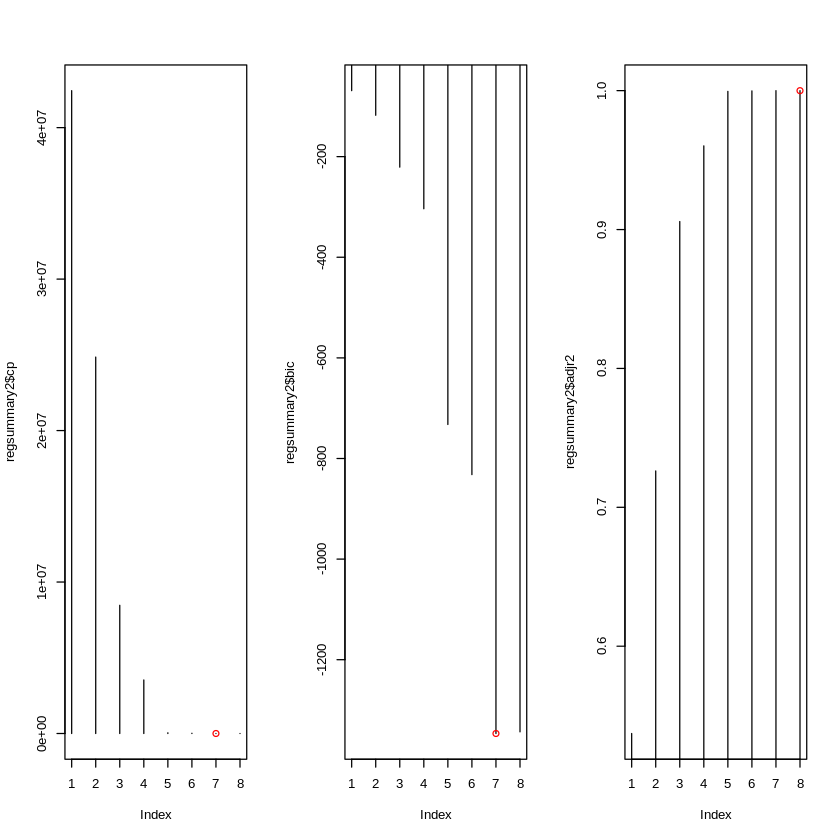

In [ ]:
regfit2 <- regsubsets(y2 ~ poly(X, 10), data=df2)
regsummary2 <- summary(regfit2)

par(mfrow=c(1,3))
plot(regsummary2$cp, type="h")
  points(which.min(regsummary2$cp), regsummary2$cp[which.min(regsummary2$cp)], col="red")
plot(regsummary2$bic, type="h")
  points(which.min(regsummary2$bic), regsummary2$bic[which.min(regsummary2$bic)], col="red")
plot(regsummary2$adjr2, type="h")
    points(which.max(regsummary2$adjr2), regsummary2$adjr2[which.max(regsummary2$adjr2)], col="red")

regsummary2$which[c(which.min(regsummary2$cp),
                   which.min(regsummary2$bic),
                   which.max(regsummary2$adjr2)),]

11 x 1 sparse Matrix of class "dgCMatrix"
                     s1
(Intercept)   -125.9218
1            -9516.0859
2            -9143.5399
3           -13966.6578
4            -3945.6659
5            -3550.1489
6             -160.5328
7             -251.6589
8                .     
9                .     
10               .     

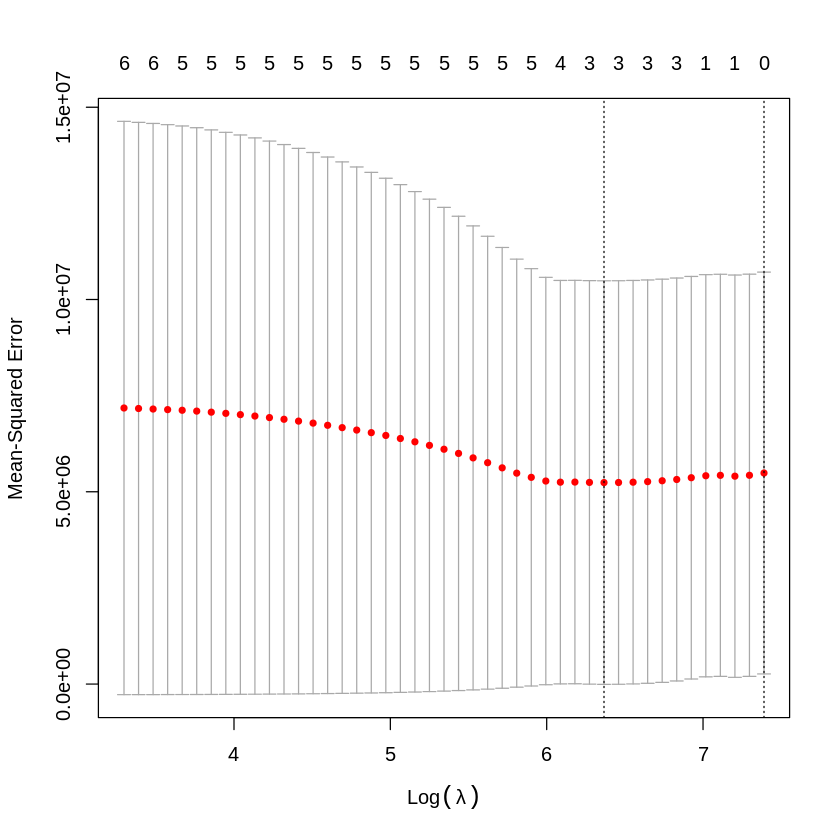

In [ ]:
y2_train <- as.matrix(df2[train_ind, 1])
y2_test <- as.matrix(df2[-train_ind, 1])

lasso_m2 <- glmnet(poly(x_train, 10), y2_train, alpha=1, lambda=grid)
#plot(lasso_m2)

cv.out2 <- cv.glmnet(poly(x_train, 10), y2_train, alpha=1)
plot(cv.out2)
bestlam2 <- cv.out$lambda.min
lasso.pred2 <- predict(lasso_m2, s=bestlam2, newx=poly(x_test, 10))

lasso.coef2 <- predict(lasso_m2, type="coefficients", s=bestlam2)
lasso.coef2

Both methods agree.  Interestingly, instead of only including $X^7$, they include all terms up to $X^7$.

### Question 9

In this exercise, we will predict the number of applications received using the other variables in the `College` data set.

> (a) Split the data set into a training set and a test set.

> (b) Fit a linear model using least squares on the training set, and report the test error obtained.

> (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

> (d) Fit a lasso model on the training set, with $λ$ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

> (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

> (f) Fit a PLS model on the training set, with $M$ chosen by crossvalidation. Report the test error obtained, along with the value of $M$ selected by cross-validation.

> (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

#### Answer to a

***Split the data set into a training set and a test set.***

In [12]:
#install.packages("ISLR2")
library(ISLR2)

data(College)
d <- College
d$Private <- as.integer(d$Private)-1

train_p <- 0.8
train_n <- floor(train_p*nrow(d))
train_ind <- sample(1:nrow(d), size=train_n, replace=FALSE, prob=NULL)
d_train <- d[train_ind,]
d_test <- d[-train_ind,]

x_train <- as.matrix(d_train[, -which(names(d_train) == "Apps")])
y_train <- as.matrix(d_train[,"Apps"])
x_test <- as.matrix(d_test[, -which(names(d_test) == "Apps")])
y_test <- as.matrix(d_test[,"Apps"])

#### Answer to b

***Fit a linear model using least squares on the training set, and report the test error obtained.***

There are better ways of handling this that are discussed later in the book, but I'm going to use `log(Apps)` to account for the fact that `Apps` can only be positive.

In [ ]:
m_LS <- lm((Apps) ~ ., data=d_train)
pred_LS <- predict(m_LS, d_test)
LS_testErr <- (pred_LS - log(d_test$Apps))^2
mean(LS_testErr)

[1] 16880629

#### Answer to c

***Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.***

In [ ]:
#install.packages("glmnet")
library(glmnet)

grid <- 10^seq(10, -2, length=100)
ridge_m <- glmnet(x_train, y_train, alpha=0, lambda=grid)

cv.out <- cv.glmnet(x_train, y_train, alpha=0)
#plot(cv.out)
bestlam <- cv.out$lambda.min
ridge.pred <- predict(ridge_m, s=bestlam, newx=x_test)
ridge.err <- mean((ridge.pred - y_test)^2)
ridge.err

ridge.coef <- predict(ridge_m, type="coefficients", s=bestlam)
ridge.coef

[1] 759872

18 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -1.630035e+03
Private     -5.522688e+02
Accept       1.024248e+00
Enroll       4.074055e-01
Top10perc    2.957913e+01
Top25perc   -6.248946e-01
F.Undergrad  6.550379e-02
P.Undergrad  4.208487e-02
Outstate    -2.329988e-02
Room.Board   2.032162e-01
Books        7.095154e-03
Personal     2.676057e-02
PhD         -4.978723e+00
Terminal    -4.137487e+00
S.F.Ratio    1.538873e+01
perc.alumni -7.179400e+00
Expend       7.686920e-02
Grad.Rate    1.209804e+01

#### Answer to d

***Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.***

In [ ]:
grid <- 10^seq(10, -2, length=100)
lasso_m <- glmnet(x_train, y_train, alpha=1, lambda=grid)

cv.out <- cv.glmnet(x_train, y_train, alpha=1)
#plot(cv.out)
bestlam <- cv.out$lambda.min
lasso.pred <- predict(lasso_m, s=bestlam, newx=x_test)
lasso.err <- mean((lasso.pred - y_test)^2)
lasso.err

lasso.coef <- predict(lasso_m, type="coefficients", s=bestlam)
lasso.coef

[1] 705868.3

18 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -692.57869828
Private     -477.67933948
Accept         1.52034271
Enroll        -0.42870154
Top10perc     45.60155874
Top25perc     -9.00414857
F.Undergrad    .         
P.Undergrad    0.04742497
Outstate      -0.06581637
Room.Board     0.13297372
Books          .         
Personal       0.04238008
PhD           -7.19453979
Terminal      -2.65354947
S.F.Ratio     11.50691082
perc.alumni    .         
Expend         0.07165194
Grad.Rate      6.65614145

#### Answer to e

***Fit a PCR model on the training set, with $M$ chosen by crossvalidation. Report the test error obtained, along with the value of $M$ selected by cross-validation.***

Data: 	X dimension: 621 17 
	Y dimension: 621 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4031     3989     2139     2147     1866     1662     1647
adjCV         4031     3988     2136     2147     1797     1634     1642
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1613     1616     1572      1554      1559      1560      1565
adjCV     1600     1608     1568      1550      1556      1557      1562
       14 comps  15 comps  16 comps  17 comps
CV         1566      1497      1245      1180
adjCV      1563      1482      1235      1172

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X      31.244    56.95    64.09    69.72    75.11    80.11    83.72    87.19
Apps    3.704    72.83    72.84    81.14    83.92    84.31    85.24    85.2

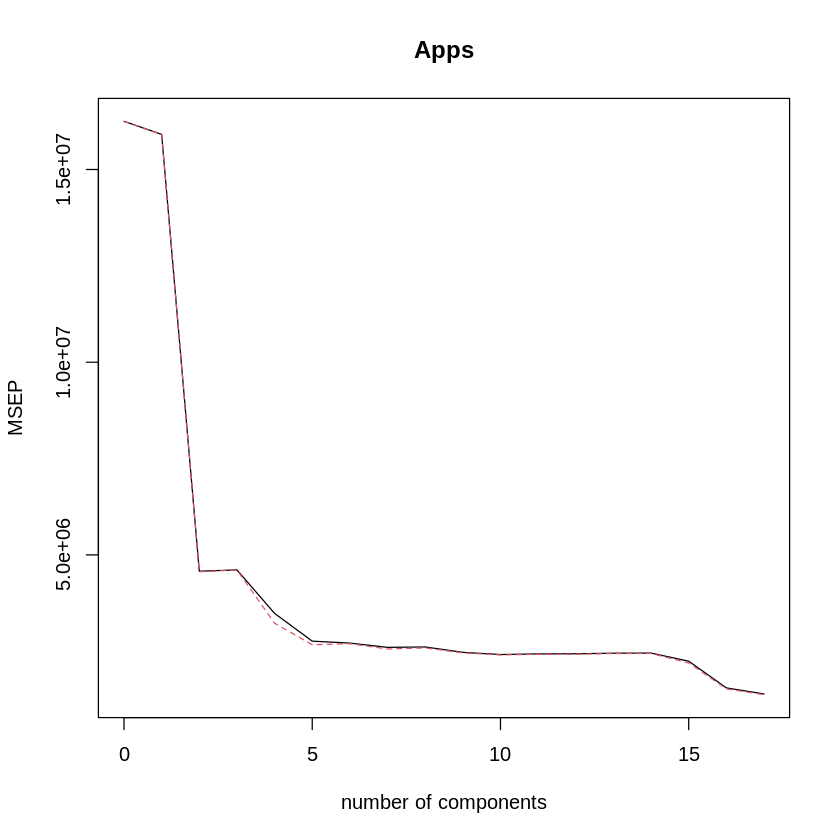

In [13]:
#install.packages("pls")
library(pls)

pcr.fit <- pcr(Apps ~ ., data=d_train, scale=TRUE, validation="CV")
summary(pcr.fit)
validationplot(pcr.fit, val.type="MSEP")

The best $M$ value for the training data is $M=17$.  Let's now predict the test data and find the error.

In [20]:
pcr.pred <- as.numeric(predict(pcr.fit, x_test, ncomp=17))
mean((pcr.pred - y_test)^2)

[1] 920742.8